In [1]:
import pandas as pd
import numpy as np


### 1- Describe the data clearly -- particularly any missing data that might impact your analysis -- and the provenance of your dataset. Who collected the data and why? (10/100 pts)


In [13]:
companies= pd.read_csv("sp500_companies.csv")
index = pd.read_csv("sp500_index.csv")
stocks = pd.read_csv("sp500_stocks.csv")

Exploring companies

In [40]:
companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [15]:
companies.columns

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

In [16]:
companies["Exchange"].value_counts()

Exchange
NYQ    348
NMS    152
BTS      1
NGM      1
Name: count, dtype: int64

In [36]:
#see what companies have same short/long name
same_names = companies[companies["Shortname"] == companies["Longname"]]
list(same_names["Shortname"])[:10]
len(list(same_names["Shortname"])) #378 of same values

#diff short/longname
diff_names = companies[companies["Shortname"] != companies["Longname"]]
diff_names[["Shortname", "Longname"]] #124 companies

,Shortname,Longname
9,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.
12,JP Morgan Chase & Co.,JPMorgan Chase & Co.
19,Procter & Gamble Company (The),The Procter & Gamble Company
20,"Home Depot, Inc. (The)","The Home Depot, Inc."
26,Coca-Cola Company (The),The Coca-Cola Company
...,...,...
480,Generac Holdlings Inc.,Generac Holdings Inc.
485,"MarketAxess Holdings, Inc.",MarketAxess Holdings Inc.
490,Invesco Ltd,Invesco Ltd.
492,Mosaic Company (The),The Mosaic Company


In [39]:
companies.Sector.value_counts()
companies.Industry.value_counts()

Industry
Utilities - Regulated Electric        23
Specialty Industrial Machinery        16
Software - Application                15
Semiconductors                        14
Software - Infrastructure             14
                                      ..
REIT - Hotel & Motel                   1
Security & Protection Services         1
Pharmaceutical Retailers               1
Leisure                                1
Furnishings, Fixtures & Appliances     1
Name: count, Length: 114, dtype: int64

Companies column descriptions

| Column | Description |
|---------|--------------|
| **Exchange** | Stock exchange the company is traded on. <br>• NYQ — New York Stock Exchange (NYSE) <br>• NMS — NASDAQ Global Select Market <br>• BTS — BATS Exchange (now Cboe BZX) |
| **Symbol** | Company name symbol / stock trade abbreviation. |
| **Shortname** | Short version of the company name. |
| **Longname** | Long version of the company name (≈¾ of companies have the same short and long name, or very similar). |
| **Sector** | Broad category describing the company’s general economic activity (e.g., Technology, Industrials, Financial Services, Healthcare). |
| **Industry** | More specific classification within a sector that describes the company’s main business activity (e.g., Software, Semiconductors, Banks). |
| **Currentprice** | Latest stock value per share. |
| **Marketcap** | Total market value of the company. <br>Formula: *Market Cap = Current Price × Number of Shares*. |
| **Ebitda** | Earnings Before Interest, Taxes, Depreciation, and Amortization — profit from core operations before accounting for financing or tax effects. |
| **Revenuegrowth** | Percentage change in the company’s revenue compared to the previous period. |
| **City** | City where the company is headquartered. |
| **State** | State where the company is headquartered. |
| **Country** | Country where the company is headquartered. |
| **Fulltimeemployees** | Number of full-time employees at the company. |
| **Longbusinesssummary** | Summary of the company’s business activities, products, and services. |
| **Weight** | Weight of the stock in the overall market or index (represents its proportion of total market value). |


Exploring index

In [41]:
index.head()

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


In [46]:
index["Date"][0] #'2014-12-23'
len(index)
index["Date"][2516]#2024-12-20


'2024-12-20'

Average of S&P closing index value (weighted average, meaning larger companies have a larger impact)

States these averages from December 2014-2024

Exploring stocks

In [47]:
stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,44.016731,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.741032,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.361343,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.393166,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.705967,70.501671,70.501671,69.648827,69.974915,4073337.0


In [49]:
print(f"last stock collected", stocks["Date"].max())
print(f"first stock in dataset", stocks["Date"].min())

last stock collected 2024-12-20
first stock in dataset 2010-01-04


In [50]:
stocks.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')


| Column | Description |
|---------|--------------|
| **Date** | The specific trading day for the stock datafrom 2010 to 2024 |
| **Symbol** | The stock’s ticker symbol or trading abbreviation (e.g., AAPL for Apple). |
| **Adj Close** | Adjusted closing price — the closing price modified to account for dividends, stock splits, and other corporate actions. Reflects the stock’s *true value* over time for return calculations. -vconfusing stuff|
| **Close** |  last traded price of the stock during normal trading hours on that date |
| **High** |  highest price the stock reached during the trading day. |
| **Low** |  lowest price the stock reached during the trading day. |
| **Open** |  price at which the stock first traded when the market opened that day. |
| **Volume** | The total number of shares traded during that trading day |


### overview of dataset

Financial Time series, S&P500 Stocks: There are 500 time series here. Model how individual time series adjust over time, either together or separately. (https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks)


Description (From Kaggle): The Standard and Poor's 500 or S&P 500 is the most famous financial benchmark in the world.

This stock market index tracks the performance of 500 large companies listed on stock exchanges in the United States. As of December 31, 2020, more than $5.4 trillion was invested in assets tied to the performance of this index.

Because the index includes multiple classes of stock of some constituent companies—for example, Alphabet's Class A (GOOGL) and Class C (GOOG)—there are actually 505 stocks in the gauge.

# look into missing data + why datacollected


### 2- What phenomenon are you modeling? Provide a brief background on the topic, including definitions and details that are relevant to your analysis. Clearly describe its main features, and support those claims with data where appropriate. (10/100 pts)


### 3-  Describe your non-parametric model (empirical cumulative distribution functions, kernel density function, local constant least squares regression, Markov transition models). How are you fitting your model to the phenomenon to get realistic properties of the data? What challenges did you have to overcome? (15/100 pts)


playing around with random models (looking at s&P)


In [56]:
import matplotlib.pyplot as plt

In [54]:
index = index.rename(columns={"S&P500": "Price"})
index.head(5)

,Price
Date,
2014-12-22,2078.54
2014-12-23,2082.17
2014-12-24,2081.88
2014-12-26,2088.77
2014-12-29,2090.57


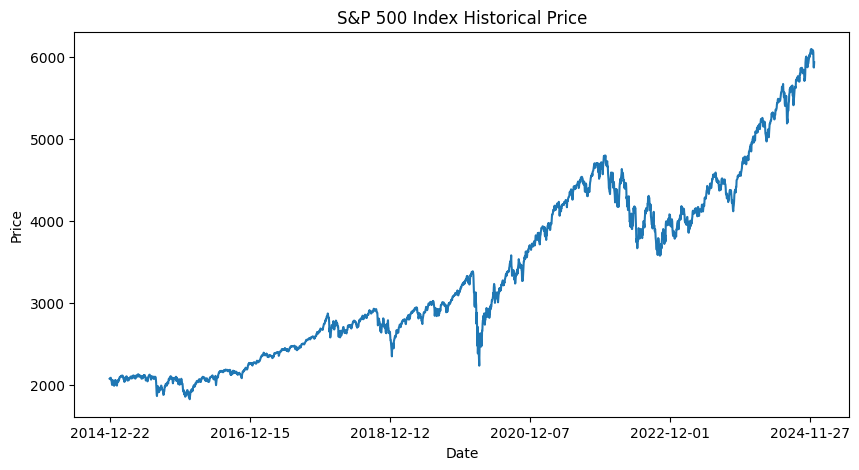

In [57]:
index["Price"].plot(figsize=(10, 5))
plt.title("S&P 500 Index Historical Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

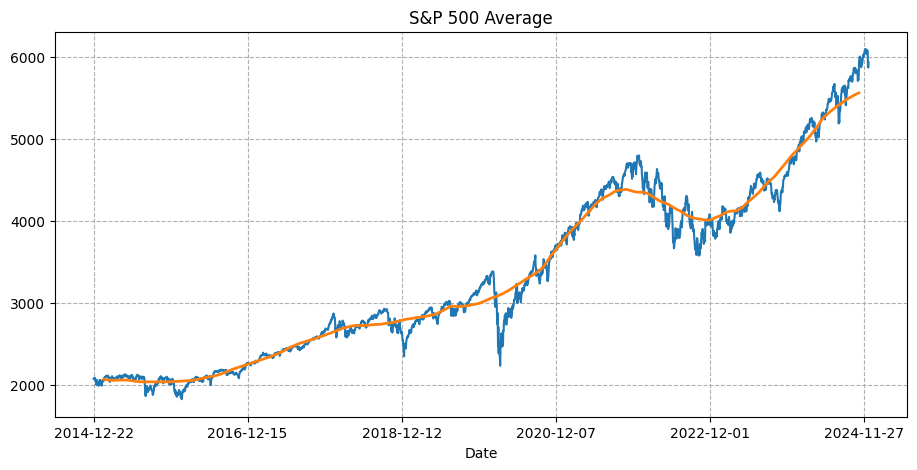

In [67]:
#average line
average = index.rolling(
    window=300,
    center=True,
    min_periods=183,
).mean()


ax = index["Price"].plot(title="S&P 500 Average")
ax = average.plot(ax=ax, label="Moving Average", linewidth=2, figsize=(11, 5), legend=False)
plt.grid( linestyle="--")

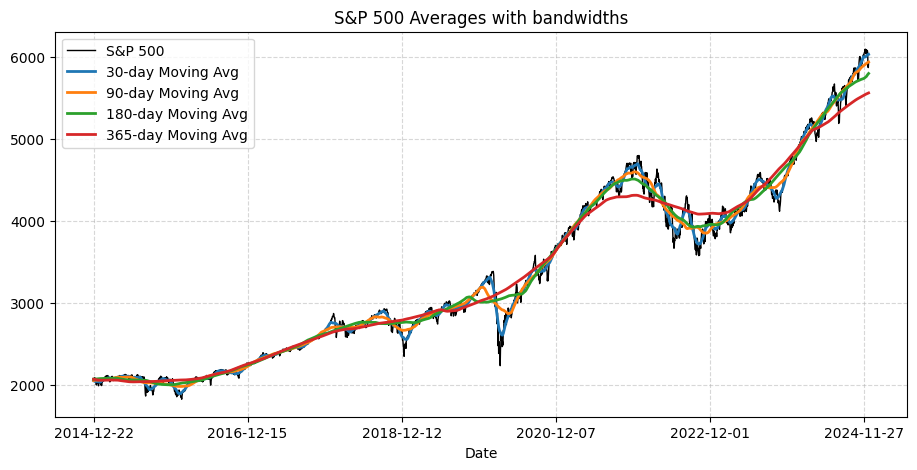

In [74]:
import matplotlib.pyplot as plt

# testing different bandwidths
windows = [30, 90, 180, 365]
fig, ax = plt.subplots(figsize=(11, 5))
index["Price"].plot(ax=ax, label="S&P 500", color="black", linewidth=1)

for w in windows:
    avg = index["Price"].rolling(window=w, center=True, min_periods=w//2).mean()
    avg.plot(ax=ax, linewidth=2, label=f"{w}-day Moving Avg")

plt.title("S&P 500 Averages with bandwidths")
plt.grid(linestyle="--", alpha=0.5)
plt.legend()
plt.show()

#i like 180 day da best

In [81]:

# lets make a markov chain!!
#used chat bc i just wanted a start am going to go back l8r n fix her up!!

index["Return"] = index["Price"].pct_change()

# Define states:
# 'up' = return > 0
# 'down' = return < 0
# 'flat' = return ≈ 0 (can use small threshold)
threshold = 0.0001
index["State"] = np.where(index["Return"] > threshold, "up",
                          np.where(index["Return"] < -threshold, "down", "flat"))

# Drop NaN from first row
index = index.dropna(subset=["State"])
    

In [76]:
# Create a transition count table
transition_counts = pd.crosstab(index["State"][:-1], index["State"][1:])

# Convert counts to probabilities
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)

print(transition_matrix)


State  down  flat   up
State                 
down    1.0   0.0  0.0
flat    0.0   1.0  0.0
up      0.0   0.0  1.0


In [79]:
# 1. Calculate daily returns
index["Return"] = index["Price"].pct_change()

# 2. Define states
threshold = 0.0001
index["State"] = np.where(index["Return"] > threshold, "up",
                          np.where(index["Return"] < -threshold, "down", "flat"))

# Drop NaN from first row
index = index.dropna(subset=["State"])

# 3. Correctly align current and next states
current_states = index["State"].iloc[:-1].values
next_states = index["State"].iloc[1:].values

# 4. Build transition count table
transition_counts = pd.crosstab(pd.Series(current_states, name="Current"),
                                pd.Series(next_states, name="Next"))

# 5. Convert counts to probabilities
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)

print(transition_matrix)


Next         down      flat        up
Current                              
down     0.432810  0.011344  0.555846
flat     0.382353  0.000000  0.617647
up       0.476796  0.014970  0.508234


In [80]:
np.random.seed(42)

# Start in a given state
current_state = "up"
simulated_states = [current_state]

for _ in range(10):  # simulate 10 days
    next_state = np.random.choice(transition_matrix.columns,
                                  p=transition_matrix.loc[current_state].values)
    simulated_states.append(next_state)
    current_state = next_state

print(simulated_states)


['up', 'down', 'up', 'up', 'up', 'down', 'down', 'down', 'up', 'up', 'up']


### 4- Either use your model to create new sequences (if the model is more generative) or bootstrap a quantity of interest (if the model is more inferential). (15/100 pts)


### 5- Critically evaluate your work in part 4. Do your sequences have the properties of the training data, and if not, why not? Are your estimates credible and reliable, or is there substantial uncertainty in your results? (15/100 pts)


### 5-  Write a conclusion that explains the limitations of your analysis and potential for future work on this topic. (10/100 pts)